In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
def load_ratings(path):
    COL_NAME = ['userId','movieId','rating','timestamp']
    df = pd.read_csv(os.path.join(path,"ratings.dat"),sep='::', header=None, engine='python', names=COL_NAME)
    return df

def load_movies(path):
    COL_NAME = ['movieId','title','genres']
    df = pd.read_csv(os.path.join(path,"movies.dat"),sep='::', header=None, engine='python', names=COL_NAME, encoding = 'ISO-8859-1' )
    return df

def load_users(path):
    COL_NAME = ['userId','gender','age','Occupation','zip_code']
    df = pd.read_csv(os.path.join(path,"users.dat"),sep='::', header=None, engine='python', names=COL_NAME)
    return df

In [31]:
#영재
#연대별 평균 rating
#나이/성별에 따른 rating

In [32]:
path = "/content/drive/MyDrive/tp2/TP2/data"
ratings_df = load_ratings(path)
movies_df = load_movies(path)
users_df = load_users(path)


In [33]:
users_df

,userId,gender,age,Occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [34]:
# 'year' 열에 연도 정보 추출하여 추가
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)')

# 연도 정보가 포함된 제목 수정
movies_df['title'] = movies_df['title'].str.replace(r'\s*\(\d{4}\)', '')

print(movies_df)

      movieId                        title                        genres  year
0           1                    Toy Story   Animation|Children's|Comedy  1995
1           2                      Jumanji  Adventure|Children's|Fantasy  1995
2           3             Grumpier Old Men                Comedy|Romance  1995
3           4            Waiting to Exhale                  Comedy|Drama  1995
4           5  Father of the Bride Part II                        Comedy  1995
...       ...                          ...                           ...   ...
3878     3948             Meet the Parents                        Comedy  2000
3879     3949          Requiem for a Dream                         Drama  2000
3880     3950                    Tigerland                         Drama  2000
3881     3951             Two Family House                         Drama  2000
3882     3952               Contender, The                Drama|Thriller  2000

[3883 rows x 4 columns]


<ipython-input-34-68da66668598>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  movies_df['title'] = movies_df['title'].str.replace(r'\s*\(\d{4}\)', '')


In [35]:
min_year = movies_df['year'].dropna().astype(int).min()

print("Minimum year:", min_year)

Minimum year: 1919


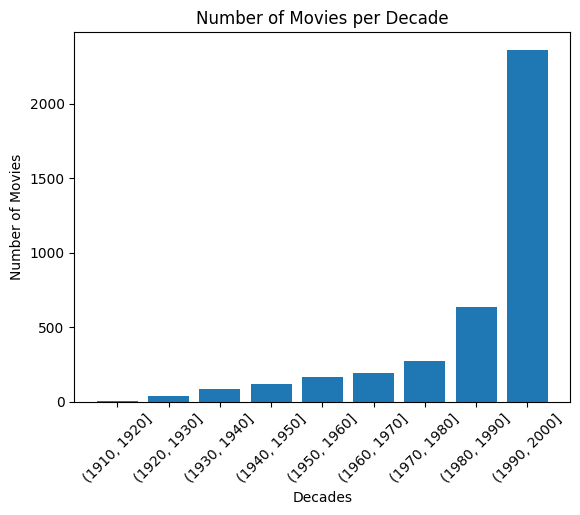

In [36]:
# 연도별 영화 개수 카운트
year_counts = movies_df['year'].value_counts().sort_index()

# 10년 단위로 연도 그룹화
year_bins = np.arange(1910, 2010, 10)
year_groups = pd.cut(movies_df['year'].astype(int), bins=year_bins)

# 각 연도 그룹별 영화 개수 카운트
year_group_counts = year_groups.value_counts().sort_index()

# 10년 단위 연도별 영화 개수 시각화
plt.bar(year_group_counts.index.astype(str), year_group_counts.values)
plt.xlabel('Decades')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Decade')
plt.xticks(rotation=45)
plt.show()

In [37]:
def categorize_decade(year):
    decade_start = (year // 10) * 10
    return f"{decade_start}s"

movies_df['decade'] = movies_df['year'].apply(lambda x: categorize_decade(int(x)) if x else None)

# 연대별 영화 개수 카운트
decade_counts = movies_df['decade'].value_counts().sort_index()

print(decade_counts)

1910s       3
1920s      34
1930s      77
1940s     126
1950s     168
1960s     191
1970s     247
1980s     598
1990s    2283
2000s     156
Name: decade, dtype: int64


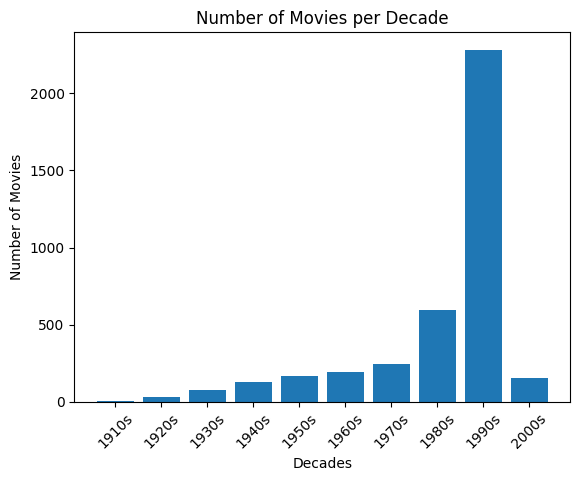

In [38]:
plt.bar(decade_counts.index, decade_counts.values)
plt.xlabel('Decades')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Decade')
plt.xticks(rotation=45)
plt.show()

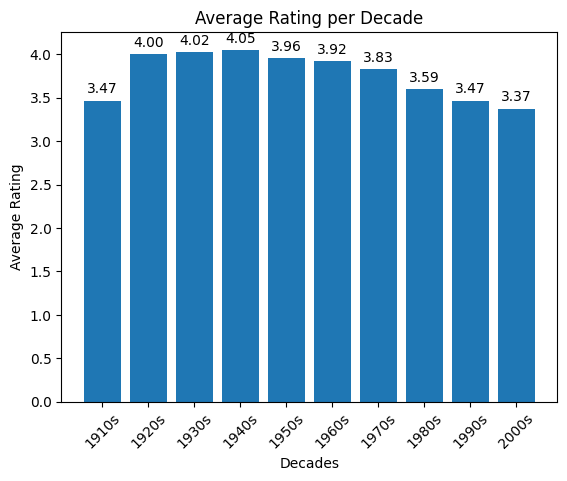

In [39]:

# 연대별 rating 평균치 시각화
plt.bar(decade_avg_ratings.index, decade_avg_ratings.values)
plt.xlabel('Decades')
plt.ylabel('Average Rating')
plt.title('Average Rating per Decade')
plt.xticks(rotation=45)

# 각 막대 위에 값 표시
for i, value in enumerate(decade_avg_ratings.values):
    plt.text(i, value + 0.05, f'{value:.2f}', ha='center', va='bottom')

plt.show()

In [41]:
merged_ratings = pd.merge(ratings_df, users_df, on='userId')


In [42]:
age_gender_avg_ratings = merged_ratings.groupby(['age', 'gender'])['rating'].mean().unstack()


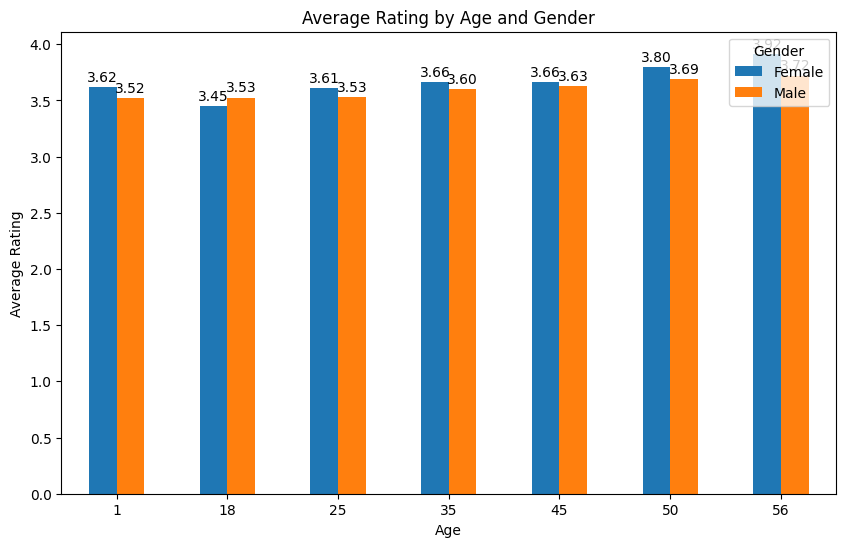

In [46]:
# 'age'와 'gender'에 따른 'rating' 평균치 시각화
ax = age_gender_avg_ratings.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Age')
plt.ylabel('Average Rating')
plt.title('Average Rating by Age and Gender')
plt.xticks(rotation=0)
plt.legend(title='Gender', loc='upper right', labels=['Female', 'Male'])

# 각 막대 위에 값 표시
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, color='black', padding=2)

plt.show()